In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


Check Missing Or Null Values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Removing Car_name As It Wont Be Beneficial In The Long Run

In [11]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Adding A New Feature And Then Will Use It To Know The Age Of Car

In [13]:
final_dataset["Current_Year"]=2021

In [14]:
final_dataset["Car_Age"]=final_dataset["Current_Year"]-final_dataset["Year"]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
final_dataset.drop(["Year"],axis=1,inplace=True)
#When inplace=True is passed, the data is renamed in place (it returns nothing)

In [17]:
final_dataset.drop(["Current_Year"],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
#It converts categorical data into dummy or indicator variables.We will later use this for one hot encoding
#Drop_first = Remove first level to get k-1 dummies out of k categorical levels.

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Lets find the correlation now btw diff features

In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
#we can also plot the correlation using seaborn
import seaborn as sns

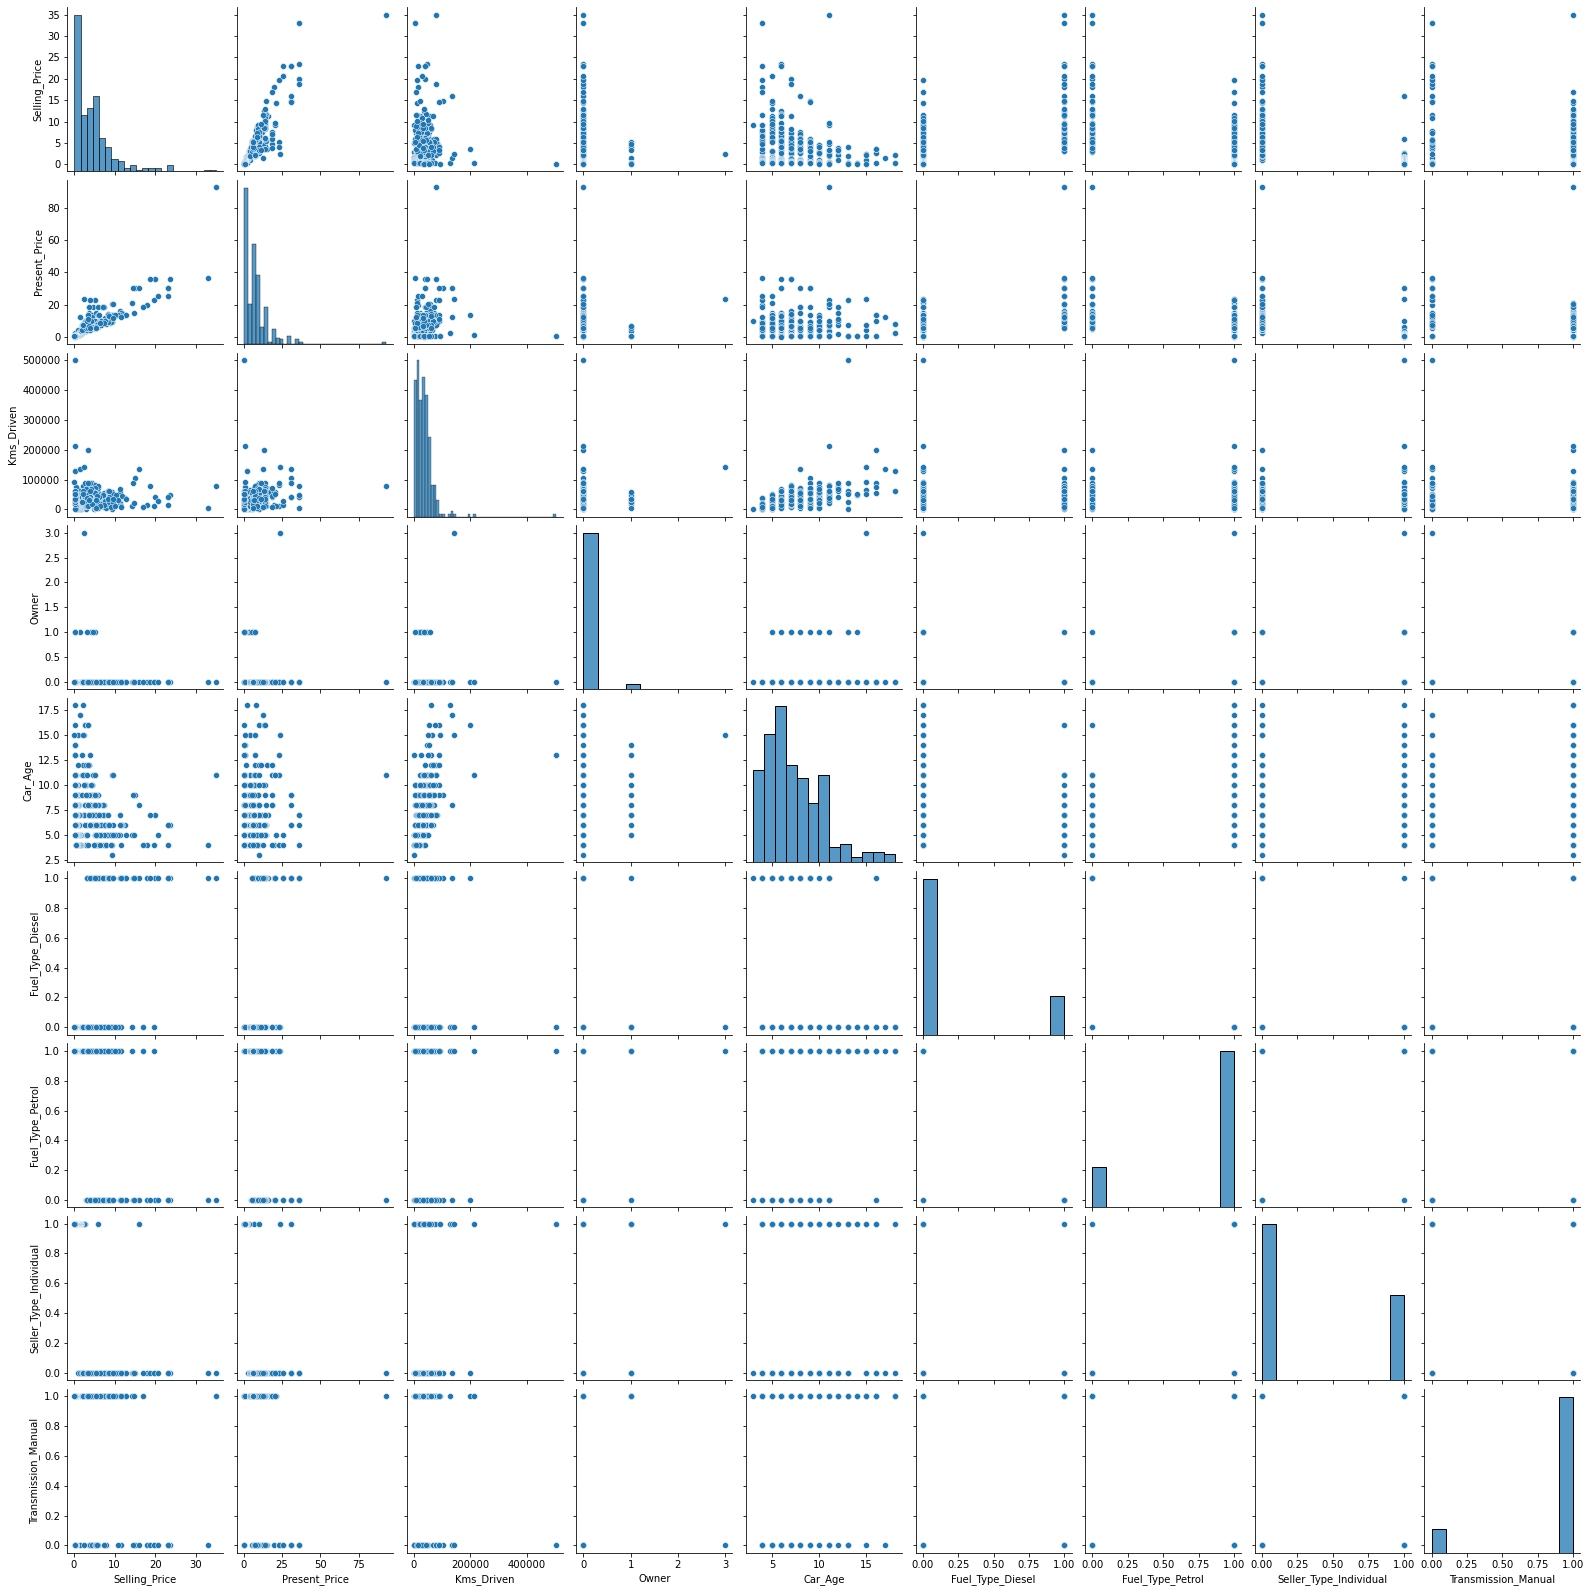

In [23]:
sns.pairplot(final_dataset)

Lets plot in a more informative way using heatmap

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
#It is a magic function that renders the figure in a notebook

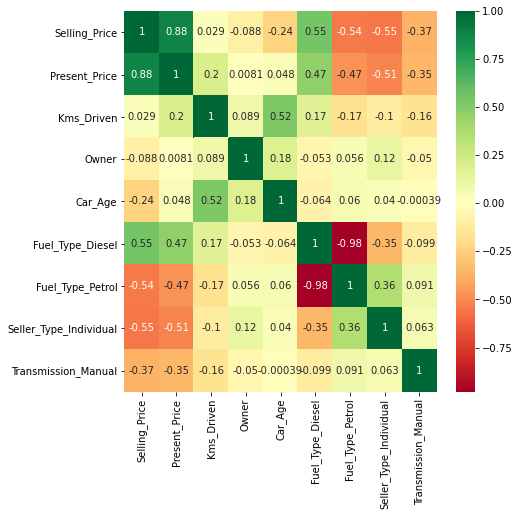

In [25]:
corrmat=final_dataset.corr()
corrmat_index=corrmat.index
plt.figure(figsize=(7,7))

#Lets heatmap !!
heat=sns.heatmap(final_dataset[corrmat_index].corr(),annot=True,cmap="RdYlGn")

#annot=If True, write the data value in each cell.
#If an array-like with the same shape as data, 
#then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

Green= Highly Correlated, Red=Not At All Related

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Lets filter independent and dependent features

In [27]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [28]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Lets Model For Understanding The Important Features!

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

Lets Plot The Importance Of Every Features

In [31]:
model.feature_importances_

array([0.38872408, 0.04478983, 0.00083462, 0.0734496 , 0.22612278,
       0.01115543, 0.12129095, 0.13363271])

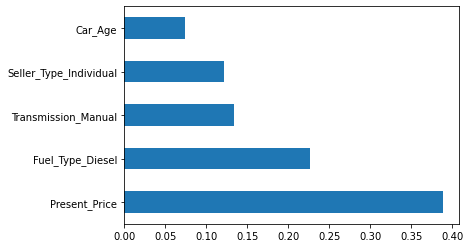

In [32]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
#First converting importance to series

feat_importance.nlargest(5).plot(kind="barh")
#showing the largest 5 features
plt.show()

Lets do the train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
248,4.60,30000,0,8,0,1,0,1
290,6.40,19000,0,7,0,1,0,1
66,23.15,11000,0,4,0,1,0,0
292,8.40,12000,0,5,0,1,0,1
140,1.20,32000,0,8,0,1,1,1


In [35]:
X_train.shape

(240, 8)

Model Time !

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

Hyperparameters !

In [37]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)#this is to show how linspace work

max_features=["auto","sqrt"]

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


n_estimators: basically means the no. of trees in the RandomForest

max_features: The way to understand Max features is "Number of features allowed to make the best split while building the tree". The reason to use this hyperparameter is, if you allow all the features for each split you are going to end up exactly the same trees in the entire random forest which might not be useful. To overcome this we let the model select a fixed number of features randomly, in this case, the no of features allowed = Square root of total no of features in your dataset."auto" dosent do anything with the max features.

in short: If “auto”, then max_features=n_features.

If “sqrt”, then max_features=sqrt(n_features).

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_sample_split: The minimum number of samples required to split an internal node

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches


Lets find the best param using RamdomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
rf_random= RandomizedSearchCV(estimator=rf, param_distributions = random_grid,
                              cv = 5, n_iter = 10, random_state=42,n_jobs=-1)

Here is the documentation: https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.

param_distributions : In this we have to pass the dictionary of parameters that we need to optimize.

cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.

n_iter : This signifies the number of parameter settings that are sampled. By default it is set as 10.

n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

Fitting the Model

In [40]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42)

Its Time To do The Prediction

In [41]:
predictions=rf_random.predict(X_test)

In [42]:
predictions

array([ 0.45287518, 22.30643401,  5.1710121 , 10.36256248,  4.60299825,
       10.33827   ,  2.75488112,  4.33184153,  0.27919057,  8.02535127,
        3.56927017,  3.27295889,  0.662365  ,  5.54805154,  0.31204956,
        0.33411505,  0.662365  ,  1.17800218,  0.57509256,  7.73258159,
        3.03317034,  0.62013081,  3.68633866,  2.90308626,  1.18500896,
        6.60401433,  6.41661555, 10.59980638, 10.39354151,  0.71101812,
        3.97845283,  0.45303946,  2.83048   ,  5.22527405,  5.56192281,
        1.17819755,  4.60645781,  0.4262936 ,  0.24040891,  7.33390205,
        5.60399591,  1.33075355, 21.94047091,  0.64784146, 10.60763159,
        0.63340543,  0.24241642,  5.33510368,  4.78135241,  0.28172991,
        2.92099707, 20.03809187,  0.46556764,  7.73211284,  4.34544016,
        7.02870954,  0.41391105,  5.53444207,  5.12314625,  0.41391105,
        7.52461008])

To Compare Visually

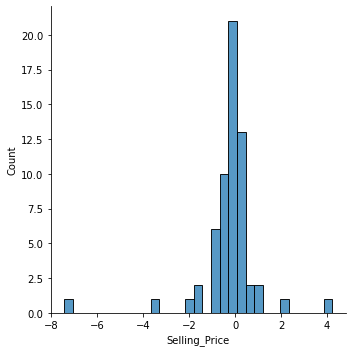

In [43]:
sns.displot(y_test - predictions)

The above graph showing normal distribution hence the prediction is good

Lets Pickle !

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file.

In [44]:
import pickle

#lets open a file where we want to store data
file=open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)